In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-07-12 13:36:29--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 64.233.188.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  67.1MB/s    in 1.0s    

2020-07-12 13:36:30 (67.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile
local_zip='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
os.listdir('/tmp/cats_and_dogs_filtered')

['train', 'vectorize.py', 'validation']

In [5]:
os.listdir('/tmp/cats_and_dogs_filtered/train')

['dogs', 'cats']

In [6]:
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/dogs')))
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/cats')))

1000
1000


In [7]:
base_dir='/tmp/cats_and_dogs_filtered'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

train_dogs_dir=os.path.join(train_dir,'dogs')
train_cats_dir=os.path.join(train_dir,'cats')

val_dogs_dir=os.path.join(validation_dir,'dogs')
val_cats_dir=os.path.join(validation_dir,'cats')

In [8]:
train_cats_filenames=os.listdir(train_cats_dir)
train_cats_filenames[:4]

['cat.955.jpg', 'cat.776.jpg', 'cat.914.jpg', 'cat.467.jpg']

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

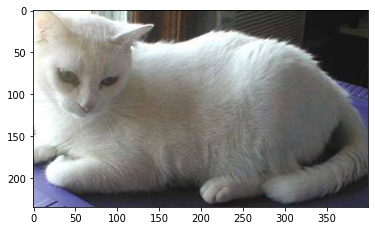

In [10]:
plt.imshow(plt.imread(os.path.join(train_cats_dir,train_cats_filenames[0])))

In [11]:
import random

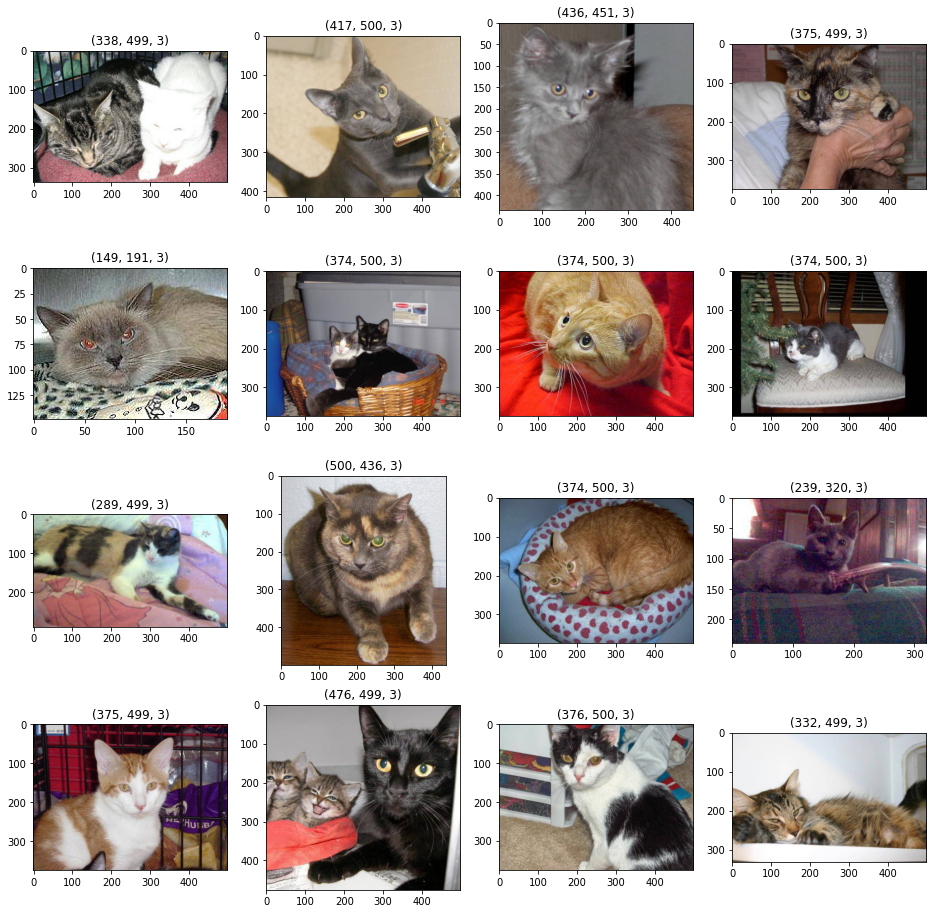

In [12]:
images=[]
plt.figure(figsize=(16,16))
for i in range(16):
  plt.subplot(4,4,i+1)
  imgname=random.choice(train_cats_filenames)
  images.append(imgname)
  img=plt.imread(os.path.join(train_cats_dir,imgname))
  plt.imshow(img)
  plt.title(img.shape)

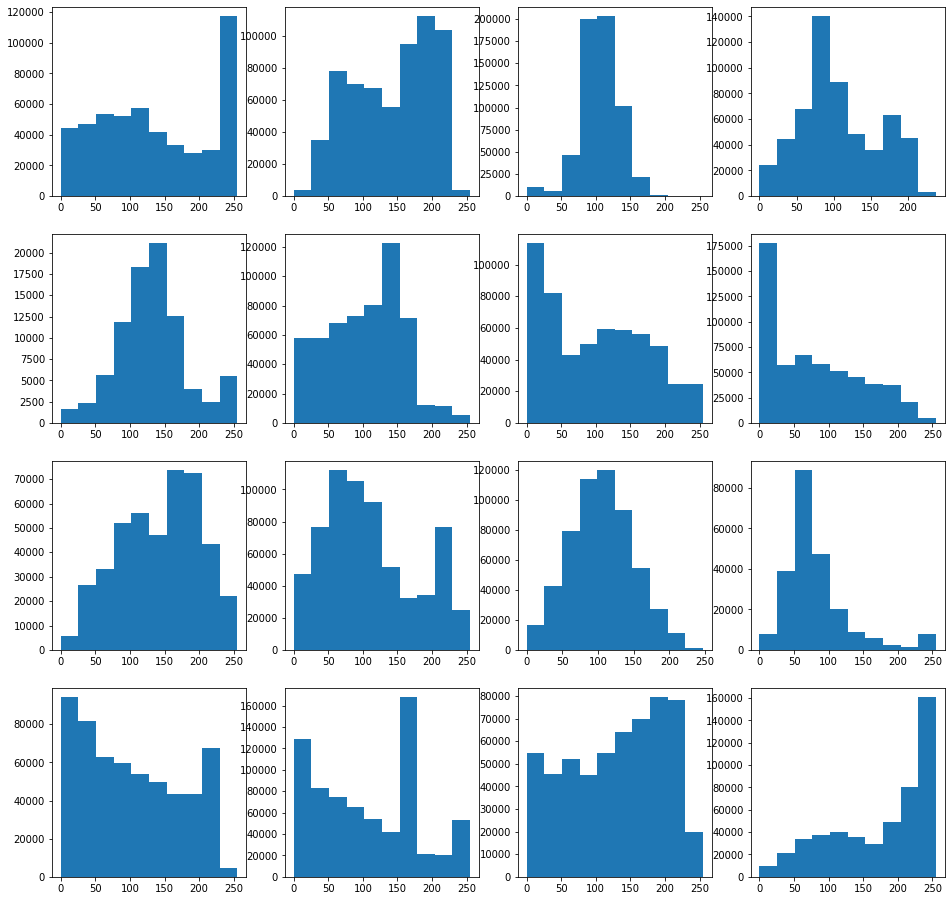

In [13]:
plt.figure(figsize=(16,16))
j=1
for i in images:
  img=plt.imread(os.path.join(train_cats_dir,i))
  plt.subplot(4,4,j)
  plt.hist(img.flat)
  j+=1

In [14]:
train_dogs_filenames=os.listdir(train_dogs_dir)
train_dogs_filenames[:4]

['dog.119.jpg', 'dog.723.jpg', 'dog.1.jpg', 'dog.638.jpg']

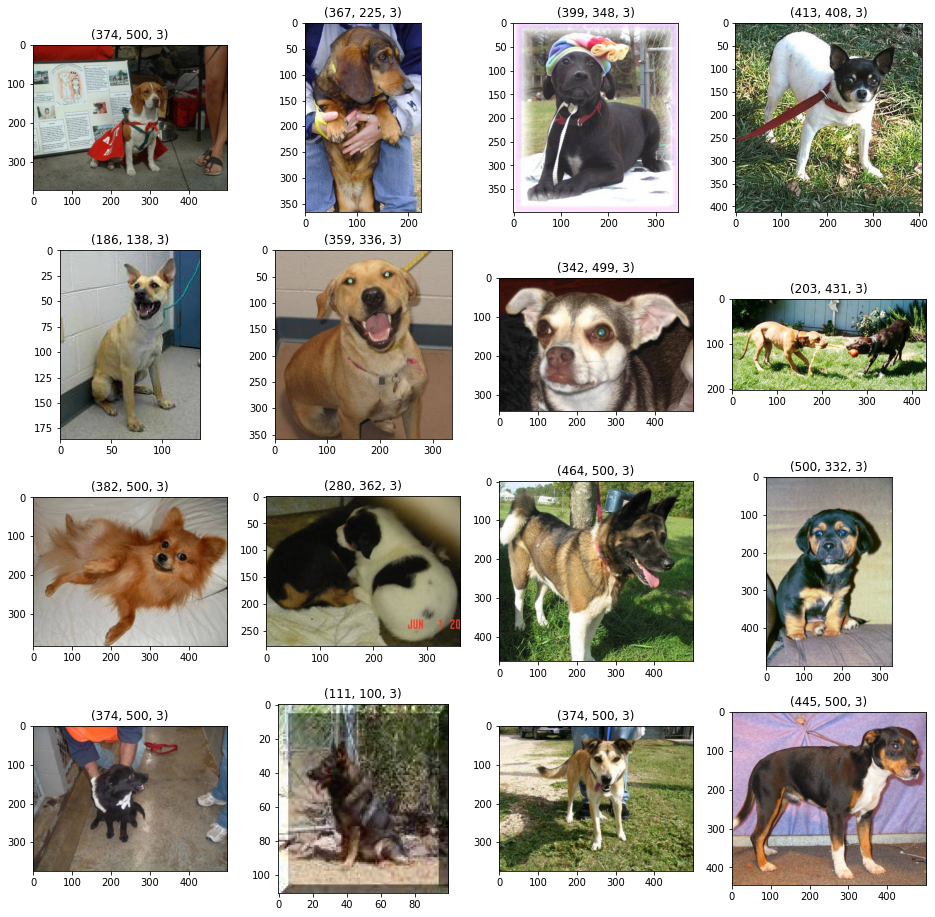

In [15]:
dogs_images=[]
plt.figure(figsize=(16,16))
for i in range(16):
  plt.subplot(4,4,i+1)
  imgname=random.choice(train_dogs_filenames)
  dogs_images.append(imgname)
  img=plt.imread(os.path.join(train_dogs_dir,imgname))
  plt.imshow(img)
  plt.title(img.shape)

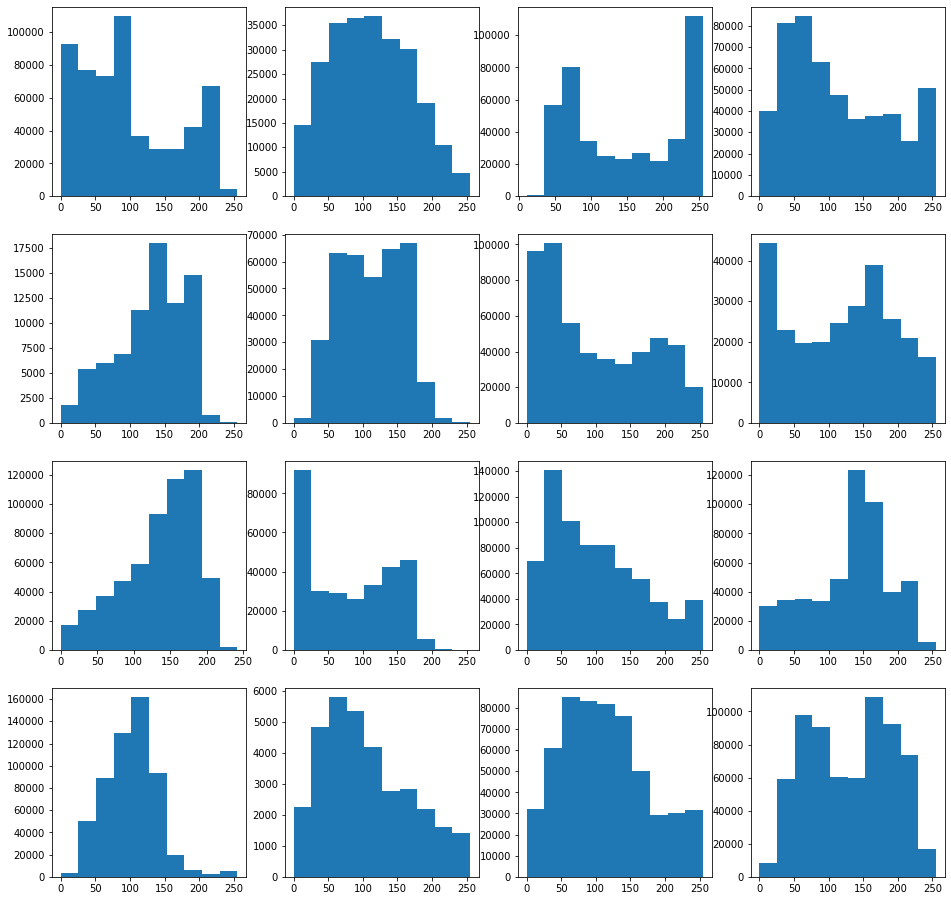

In [16]:
plt.figure(figsize=(16,16))
j=1
for i in dogs_images:
  img=plt.imread(os.path.join(train_dogs_dir,i))
  plt.subplot(4,4,j)
  plt.hist(img.flat)
  j+=1

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

validation_generator = val_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
img,labels=train_generator.next()
print(img.shape)
print(labels.shape)

(20, 150, 150, 3)
(20,)


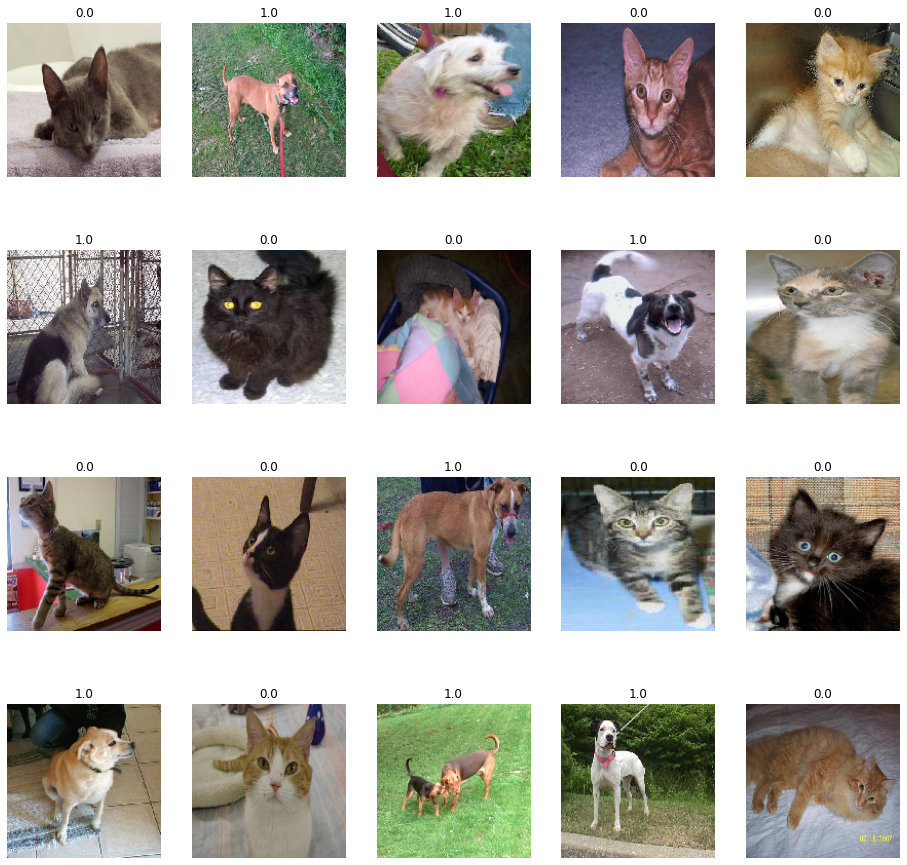

In [19]:
plt.figure(figsize=(16,16))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(img[i,:,:,:])
  plt.title(labels[i])
  plt.axis("off")

In [20]:
## import required methods
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [21]:
model = Sequential()
## add a conv layer followed by maxpooling
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model.add(Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
# Convert the featuremap into 1D  array
model.add(Flatten())
# Fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))
## Final output layer
model.add(Dense(1,activation='sigmoid'))

#let us see the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [22]:
### Compiling the model
import tensorflow as tf

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [23]:
history=model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)

Epoch 1/15
100/100 [==============================] - 54s 538ms/step - loss: 0.8141 - accuracy: 0.5785 - val_loss: 0.7166 - val_accuracy: 0.5440
Epoch 2/15
100/100 [==============================] - 53s 530ms/step - loss: 0.6220 - accuracy: 0.6820 - val_loss: 0.6204 - val_accuracy: 0.6590
Epoch 3/15
100/100 [==============================] - 53s 530ms/step - loss: 0.5377 - accuracy: 0.7345 - val_loss: 0.5557 - val_accuracy: 0.7090
Epoch 4/15
100/100 [==============================] - 53s 529ms/step - loss: 0.4525 - accuracy: 0.7950 - val_loss: 0.5800 - val_accuracy: 0.7270
Epoch 5/15
100/100 [==============================] - 53s 533ms/step - loss: 0.3665 - accuracy: 0.8340 - val_loss: 0.6231 - val_accuracy: 0.7090
Epoch 6/15
100/100 [==============================] - 53s 528ms/step - loss: 0.2892 - accuracy: 0.8800 - val_loss: 0.5977 - val_accuracy: 0.7550
Epoch 7/15
100/100 [==============================] - 52s 524ms/step - loss: 0.2124 - accuracy: 0.9160 - val_loss: 0.6453 - val_ac

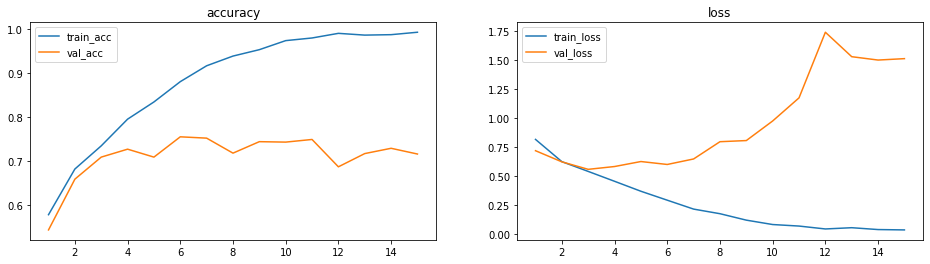

In [24]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,16))
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()

# With another model

In [26]:
model1 = Sequential()
## add a conv layer followed by maxpooling
model1.add(Conv2D(128,3,activation='relu',input_shape=(150,150,3)))
model1.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model1.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model1.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model1.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model1.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model1.add(Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
model1.add(MaxPooling2D(2))
# Convert the featuremap into 1D  array
model1.add(Flatten())
# Fully connected layer with 512 neurons
model1.add(Dense(512,activation='relu'))
## Final output layer
model1.add(Dense(1,activation='softmax'))

#let us see the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [27]:
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [28]:
history1=model.fit(train_generator,epochs=7,validation_data=validation_generator,batch_size=32)

Epoch 1/7
100/100 [==============================] - 51s 513ms/step - loss: 0.0366 - accuracy: 0.9905 - val_loss: 1.6228 - val_accuracy: 0.7400
Epoch 2/7
100/100 [==============================] - 52s 516ms/step - loss: 0.0491 - accuracy: 0.9920 - val_loss: 1.7467 - val_accuracy: 0.7400
Epoch 3/7
100/100 [==============================] - 52s 521ms/step - loss: 0.0526 - accuracy: 0.9885 - val_loss: 1.7153 - val_accuracy: 0.7290
Epoch 4/7
100/100 [==============================] - 52s 524ms/step - loss: 0.0240 - accuracy: 0.9940 - val_loss: 2.1834 - val_accuracy: 0.7320
Epoch 5/7
100/100 [==============================] - 53s 528ms/step - loss: 0.0224 - accuracy: 0.9950 - val_loss: 2.4494 - val_accuracy: 0.7070
Epoch 6/7
100/100 [==============================] - 53s 526ms/step - loss: 0.0298 - accuracy: 0.9890 - val_loss: 3.4387 - val_accuracy: 0.6640
Epoch 7/7
100/100 [==============================] - 52s 521ms/step - loss: 0.0098 - accuracy: 0.9965 - val_loss: 2.2945 - val_accuracy:

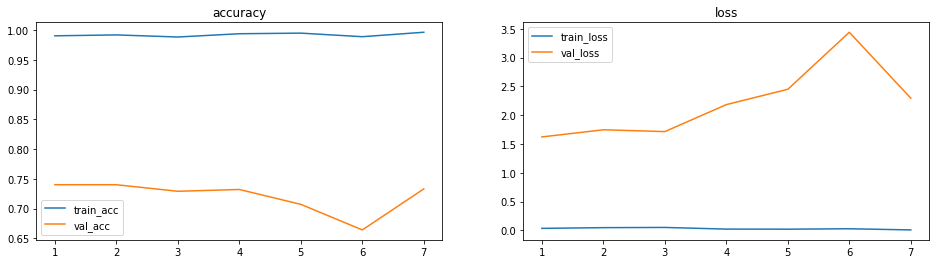

In [29]:
train_acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = list(range(1,8))
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()